In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import *

In [4]:
s1, s2 = sp.symbols('s1 s2')
s1, s2

In [5]:
half = sp.sympify('1/2')
half

In [6]:
alice = U(
    theta=sp.Piecewise(
        (pi - 2 * s1 * pi, s1 <= half),
        (0, s1 > half),
    ),
    phi=sp.Piecewise(
        (0, s1 <= half),
        ((s1 - half) * pi, s1 > half),
    ),
    lambda_=sp.Piecewise(
        (0, s1 <= half),
        ((s1 - half) * pi, s1 > half),
    ),
)
alice

⎡    ⎛⎧     0        for s₁ ≤ 1/2⎞    ⎛⎧-2⋅π⋅s₁ + π  for s₁ ≤ 1/2⎞            
⎢ -ⅈ⋅⎜⎨                          ⎟    ⎜⎨                         ⎟            
⎢    ⎝⎩π⋅(s₁ - 1/2)   otherwise  ⎠    ⎜⎩     0        otherwise  ⎟            
⎢ℯ                                ⋅cos⎜──────────────────────────⎟            
⎢                                     ⎝            2             ⎠            
⎢                                                                             
⎢                    ⎛⎧-2⋅π⋅s₁ + π  for s₁ ≤ 1/2⎞                      ⎛⎧     
⎢                    ⎜⎨                         ⎟                    ⅈ⋅⎜⎨     
⎢                    ⎜⎩     0        otherwise  ⎟                      ⎝⎩π⋅(s₁
⎢                 sin⎜──────────────────────────⎟                   ℯ         
⎣                    ⎝            2             ⎠                             

          ⎛⎧-2⋅π⋅s₁ + π  for s₁ ≤ 1/2⎞                ⎤
          ⎜⎨                         ⎟                ⎥
          ⎜⎩     0

In [7]:
bob = U(
    theta=sp.Piecewise(
        (pi - 2 * s2 * pi, s2 <= half),
        (0, s2 > half),
    ),
    phi=sp.Piecewise(
        (0, s2 <= half),
        ((s2 - half) * pi, s2 > half),
    ),
    lambda_=sp.Piecewise(
        (0, s2 <= half),
        ((s2 - half) * pi, s2 > half),
    ),
)
bob

⎡    ⎛⎧     0        for s₂ ≤ 1/2⎞    ⎛⎧-2⋅π⋅s₂ + π  for s₂ ≤ 1/2⎞            
⎢ -ⅈ⋅⎜⎨                          ⎟    ⎜⎨                         ⎟            
⎢    ⎝⎩π⋅(s₂ - 1/2)   otherwise  ⎠    ⎜⎩     0        otherwise  ⎟            
⎢ℯ                                ⋅cos⎜──────────────────────────⎟            
⎢                                     ⎝            2             ⎠            
⎢                                                                             
⎢                    ⎛⎧-2⋅π⋅s₂ + π  for s₂ ≤ 1/2⎞                      ⎛⎧     
⎢                    ⎜⎨                         ⎟                    ⅈ⋅⎜⎨     
⎢                    ⎜⎩     0        otherwise  ⎟                      ⎝⎩π⋅(s₂
⎢                 sin⎜──────────────────────────⎟                   ℯ         
⎣                    ⎝            2             ⎠                             

          ⎛⎧-2⋅π⋅s₂ + π  for s₂ ≤ 1/2⎞                ⎤
          ⎜⎨                         ⎟                ⎥
          ⎜⎩     0

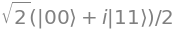

In [8]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2
psi

In [9]:
payoff_matrix = Array([
    [
        [3, 5],
        [0, 1],
    ],
    [
        [3, 0],
        [5, 1],
    ],
])
payoff_matrix

⎡⎡3  5⎤  ⎡3  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  1⎦  ⎣5  1⎦⎦

In [10]:
ewl = EWL(psi, [alice, bob], payoff_matrix)
ewl

In [11]:
ewl.payoff_function(player=1, simplify=True)

                                                                              
                                                                              
                                                                              
                                                                              
                                                2     │⎧     -sin(π⋅s₁)⋅cos(π⋅
│⎧-cos(π⋅s₁)⋅cos(π⋅s₂)  for s₁ ≤ 1/2 ∧ s₂ ≤ 1/2│      │⎪                      
│⎪                                             │      │⎪√2⋅cos(π⋅s₂)⋅cos(π⋅(s₁
│⎪-sin(π⋅s₁)⋅cos(π⋅s₂)       for s₁ ≤ 1/2      │      │⎪                      
│⎨                                             │  + 5⋅│⎨     cos(π⋅s₁)⋅cos(π⋅s
│⎪-sin(π⋅s₂)⋅cos(π⋅s₁)       for s₂ ≤ 1/2      │      │⎪                      
│⎪                                             │      │⎪     -sin(π⋅s₁)⋅cos(π⋅
│⎩ -sin(π⋅(s₁ + s₂))           otherwise       │      │⎪                      
                                                    

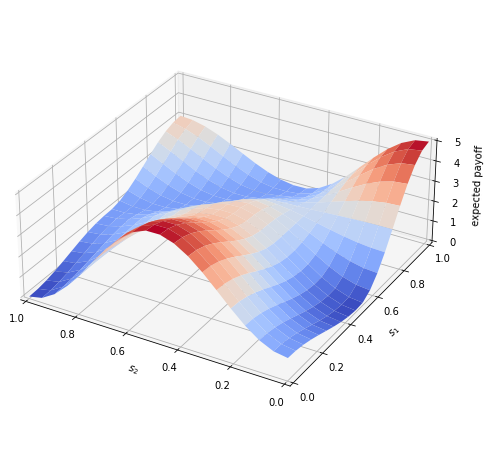

In [12]:
ewl.plot_payoff_function(
    player=0,
    x=s2, x_min=1, x_max=0,
    y=s1, y_min=0, y_max=1,
    box_aspect=(1, 1, 0.4)
)
None